In [21]:
def create_path(nr):
    str_nr = str(nr)
    if len(str_nr) == 1:
        str_nr = '0' + str_nr
    return "img/dice" + str_nr + ".jpg"

In [28]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

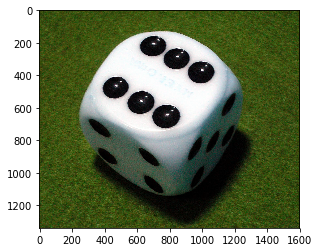

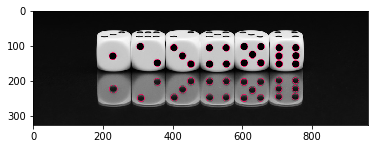

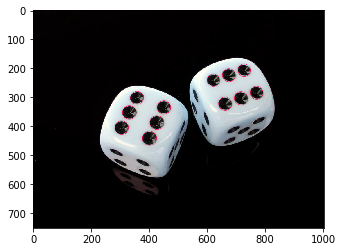

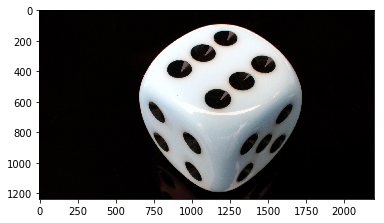

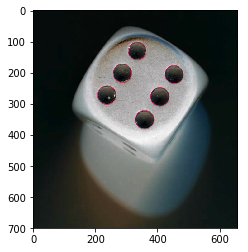

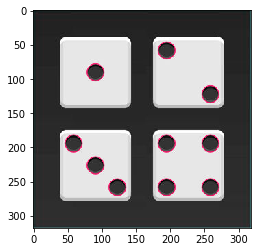

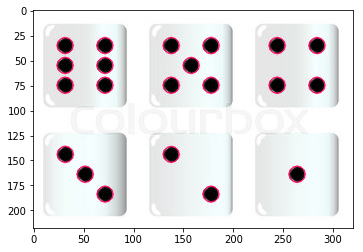

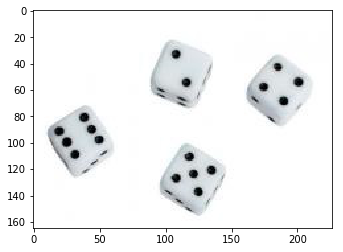

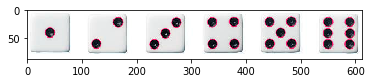

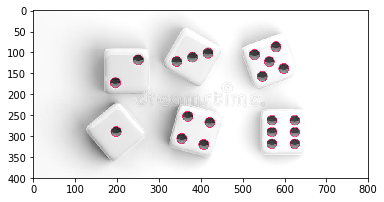

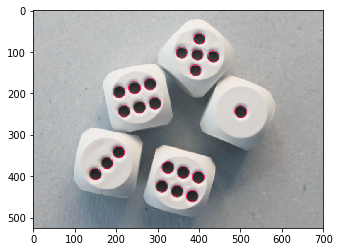

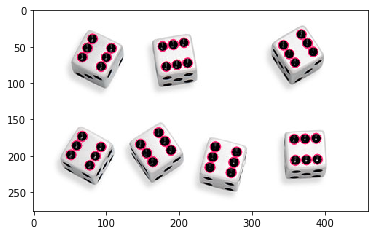

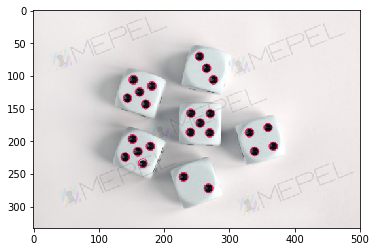

In [34]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

MAX = 13

params = cv2.SimpleBlobDetector_Params()
params.filterByArea = True
params.filterByCircularity = True
params.filterByInertia = True
params.minThreshold = 10
params.maxThreshold = 200
params.minArea = 100
params.minCircularity = 0.3
params.minInertiaRatio = 0.5

detector = cv2.SimpleBlobDetector_create(params)

for i in range(MAX):
    img = cv2.imread(create_path(i))

    keypoints = detector.detect(img)
    img_with_keypoints = cv2.drawKeypoints(img, keypoints, np.array([]), (255, 10, 100), cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

    plt.imshow(img_with_keypoints)
    plt.show()